<a href="https://colab.research.google.com/github/katduecker/dnn_osci/blob/main/explore_one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# sigmoid activation with option to stretch and shift
def sigmoid(z,sig_param):

    _slope,_bias = sig_param

    return 1.0/(1.0+np.exp(-_slope*(z+_bias)))

In [256]:
# forward dynamics/discretization, euler integration
def euler_dyn(Z,t_,params_,alpha_params_):

    # inputs:
        # input_: input image
        # params_: hyperparameters
        # t_: time vector for integration
        # alpha_params: alpha frequency & amplitude

    # discretization & dynamics parameters
    tau_h,tau_R,c,S,h_start,R_start = params_


    # alpha frequency & amplitude
    _af,_aa,_ap = alpha_params_


    # initialize empty matrices
    dt = np.diff(t_)[0]
    dh1dt = (np.zeros((len(t_)+1,)))
    dR1dt = (np.zeros((len(t_)+1,)))
    dR1dt[0] = R_start;
    dZdt = (np.zeros((len(t_)+1,)))

    # alpha inhibition
    alpha_inh1 = _aa*np.sin(2*np.pi*_af*t_+_ap)+_aa

    for _it,t in enumerate(t_):

        # pre-activation
        dZdt[_it+1] = (Z + dh1dt[_it] - dR1dt[_it] - alpha_inh1[_it])/S

        # dynamics hidden layer1
        dh1dt[_it+1] = dh1dt[_it] + dt/tau_h * (-dh1dt[_it] + sigmoid(dZdt[_it+1],[2,-2.5]))

        # adaptation term 1
        dR1dt[_it+1] = dR1dt[_it] + dt/tau_R * (-dR1dt[_it] + c*dh1dt[_it+1])



    return dZdt, dh1dt, dR1dt

In [208]:
allZ = np.arange(0,24,4)
allZ.shape[0]

6

In [249]:
0.001/10,0.001/100

(0.0001, 1e-05)

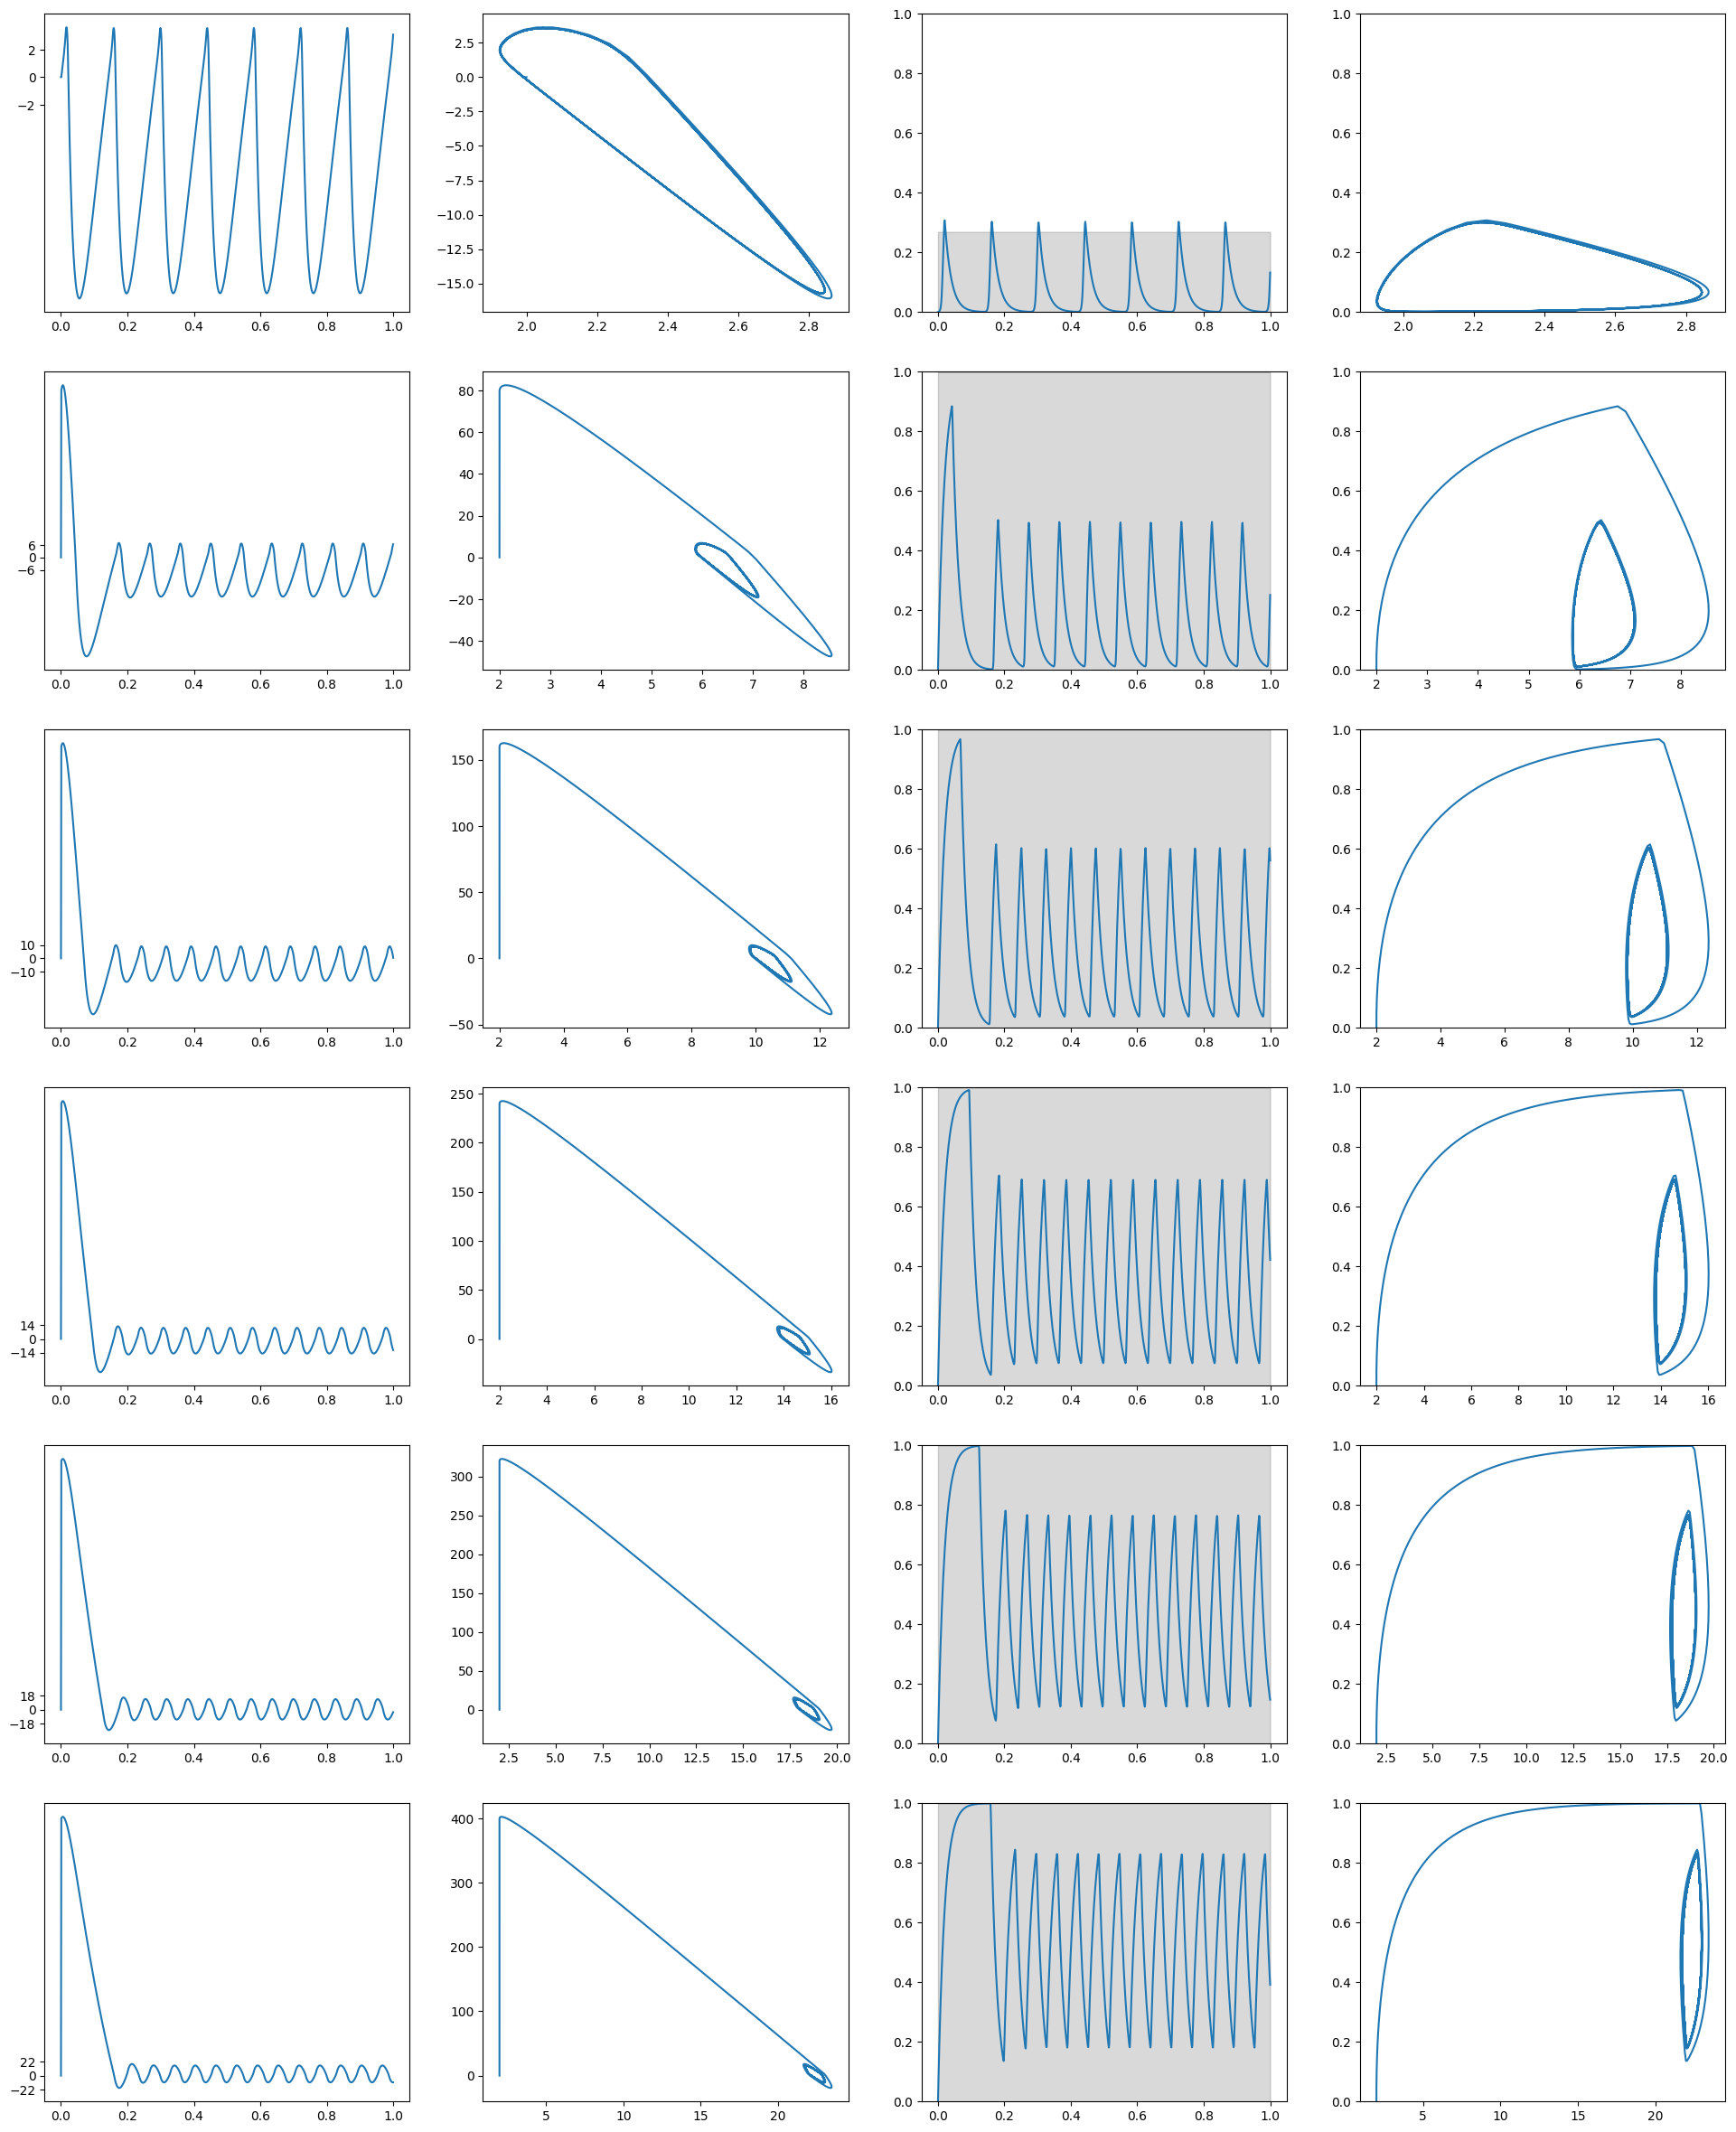

In [261]:
allZ = np.arange(2,24,4)

tau_h = 0.02
tau_R = 0.2
S = .05
h_start = 0
R_start = 2
c = 2*np.max(allZ)


fig, axs = plt.subplots(allZ.shape[0],4)
t = 0
plt.rcParams["figure.figsize"] = (24,30)

for i,Z in enumerate(allZ):


  params = [tau_h,tau_R,c,S,h_start,R_start]

  afreq = 10
  aamp = 0
  aph = 0

  alpha_params = [afreq,aamp,aph]

  timevec = np.linspace(0,1,1000)

  Zt,Ht,Rt = euler_dyn(Z,timevec,params,alpha_params)


  axs[i,0].plot(timevec[t:],Zt[t:-1])
  axs[i,0].set_yticks((-Z,0,Z))
  axs[i,1].plot(Rt[t:],Zt[t:])

  axs[i,2].plot(timevec[t:],Ht[t:-1])
  axs[i,2].fill_between(timevec[t:], np.tile(0,timevec[t:].shape[0]), np.tile(sigmoid(Z,[2,-2.5]),timevec[t:].shape[0]), alpha=0.15, color=[0, 0, 0])

  axs[i,2].set_ylim(0,1)
  axs[i,3].plot(Rt[t:],Ht[t:])
  axs[i,3].set_ylim(0,1)



In [136]:
Ht[300:].max()

0.8457286097544892